In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
lstm = pd.read_csv('FinalBC.csv')

# British Columbia

#  Burns Lake Construction Predictions

In [6]:
lstm_burns_lake = lstm[lstm['Station Name'] == 'Burns Lake'][['Date', 'Construction']]
lstm_burns_lake.set_index('Date', inplace=True)
lstm_burns_lake.index = pd.to_datetime(lstm_burns_lake.index)

In [7]:
# Scaling the Data
scaler = MinMaxScaler()
lstm_burns_lake ['Construction'] = scaler.fit_transform(lstm_burns_lake [['Construction']])


In [8]:
lstm_burns_lake['Construction'].head()

Date
2001-01-01    0.000000
2001-02-01    0.004721
2001-03-01    0.038566
2001-04-01    0.005203
2001-05-01    0.039320
Name: Construction, dtype: float64

In [9]:

def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)


In [10]:
sequence_length = 11
X, y = create_sequences(lstm_burns_lake['Construction'].values, sequence_length)


In [11]:
# Spliting the Data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [12]:
n_steps =11
n_features =1

In [13]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

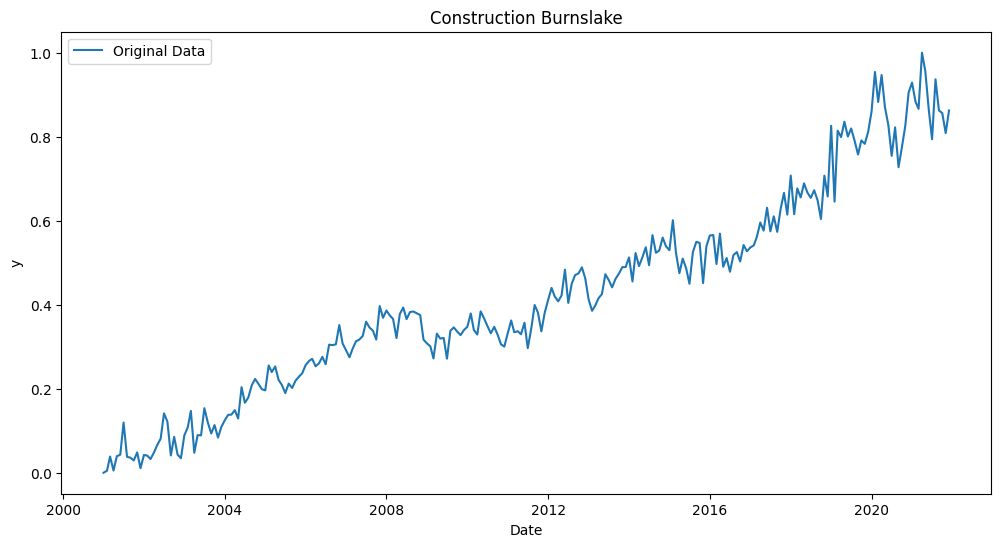

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(lstm_burns_lake.index, lstm_burns_lake['Construction'], label='Original Data')
plt.title('Construction Burnslake')
plt.xlabel('Date')
plt.ylabel('y')
plt.legend()
plt.show()

In [15]:
#Scaling the data
scaler = MinMaxScaler()
lstm_burns_lake[['Construction']] = scaler.fit_transform(lstm_burns_lake[['Construction']])
#Split the data - we split the data in 80-20 which means 80 is for training and 20 is for testing
train_size = int(len(lstm_burns_lake) * 0.8)
train, test = lstm_burns_lake[:train_size], lstm_burns_lake[train_size:]

def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 8  # Adjust based on your data

X_train, y_train = create_sequences(train['Construction'].values, sequence_length)
X_test, y_test = create_sequences(test['Construction'].values, sequence_length)

# Reshape input for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# LSTM model creation
def create_lstm_model(optimizer='adam'):
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model


2/2 [==============================] - 0s 8ms/step


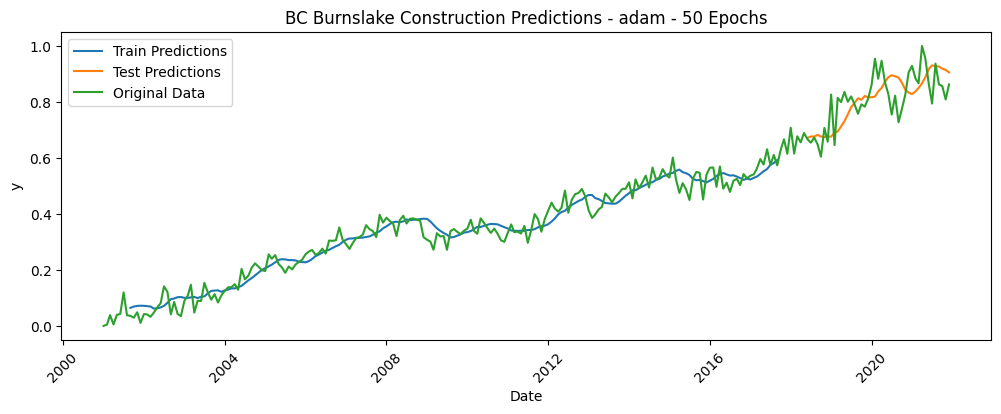

Metrics for adam - 50 Epochs:
Train MSE: 0.046310439584474415
Test MSE: 0.016349220412153948
Train MAE: 0.027652509349045985
Test MAE: 0.06220340473433124
Train RMSE: 0.03445400614208044
Test RMSE: 0.07651930428019585
2/2 [==============================] - 0s 7ms/step


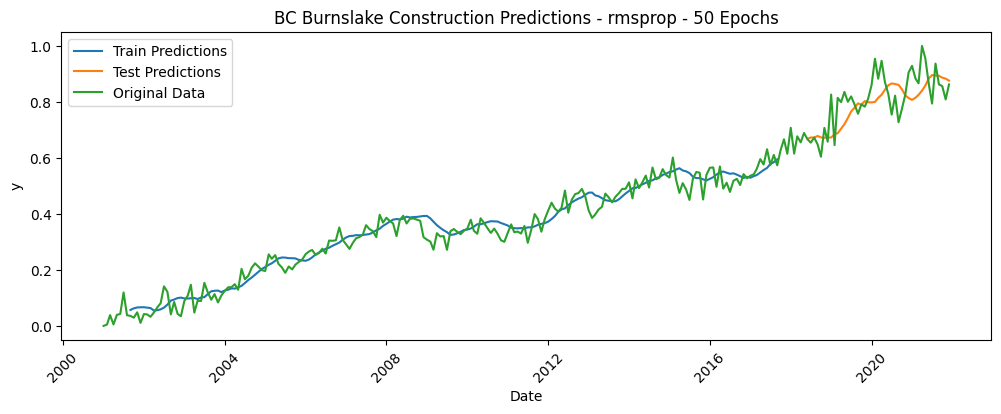

Metrics for rmsprop - 50 Epochs:
Train MSE: 0.04731036592843165
Test MSE: 0.015043722516115356
Train MAE: 0.02744400849084688
Test MAE: 0.06063322720721012
Train RMSE: 0.034979191602113775
Test RMSE: 0.07618978853590985
2/2 [==============================] - 0s 12ms/step


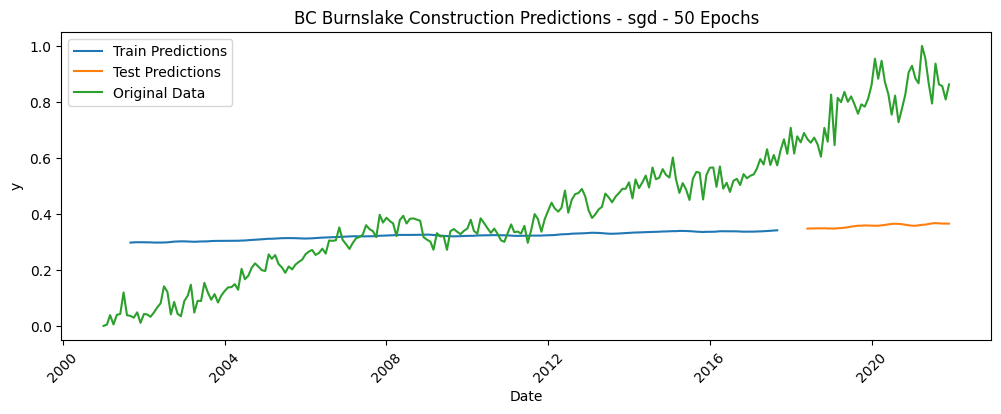

Metrics for sgd - 50 Epochs:
Train MSE: 0.024445155376786362
Test MSE: 0.21424903101498838
Train MAE: 0.11765310630025091
Test MAE: 0.45324607046156395
Train RMSE: 0.14380327588300643
Test RMSE: 0.4621094750579656
2/2 [==============================] - 0s 9ms/step


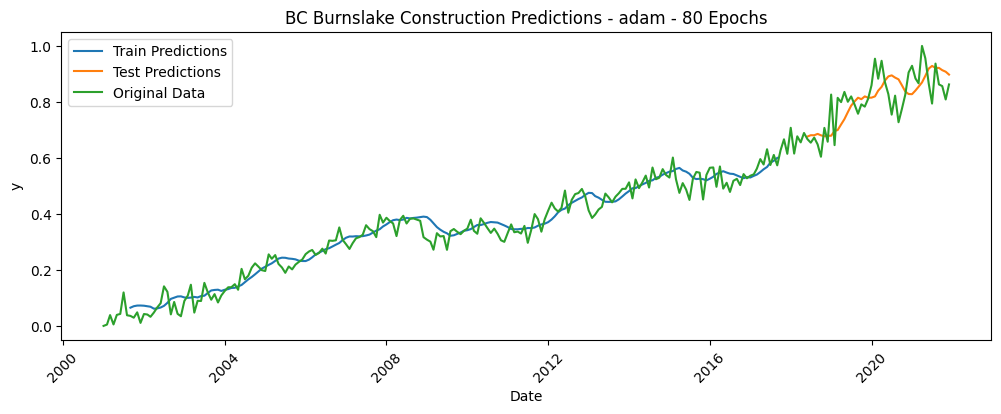

Metrics for adam - 80 Epochs:
Train MSE: 0.04687721906747673
Test MSE: 0.015854548425119953
Train MAE: 0.0273555473697036
Test MAE: 0.06085319596393415
Train RMSE: 0.03464813473478281
Test RMSE: 0.07439058742384054
2/2 [==============================] - 0s 10ms/step


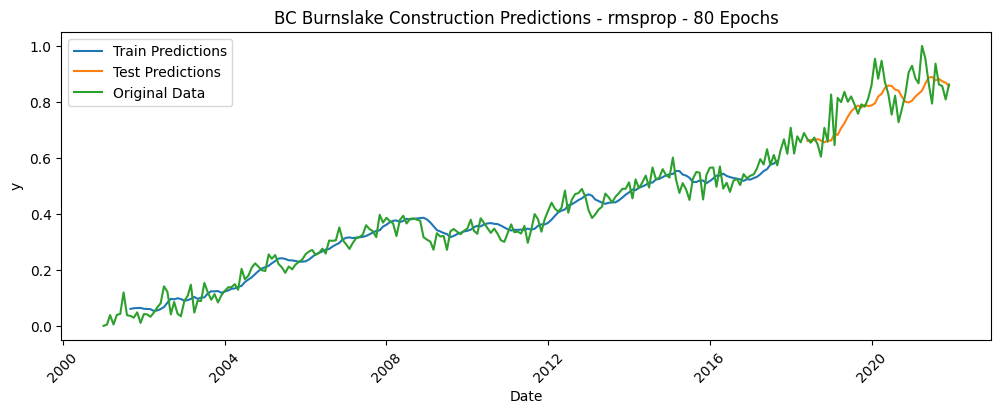

Metrics for rmsprop - 80 Epochs:
Train MSE: 0.0464303729956985
Test MSE: 0.015323992043809126
Train MAE: 0.026292007135754095
Test MAE: 0.058787044786844836
Train RMSE: 0.033119077314329205
Test RMSE: 0.07497473142398899
2/2 [==============================] - 0s 7ms/step


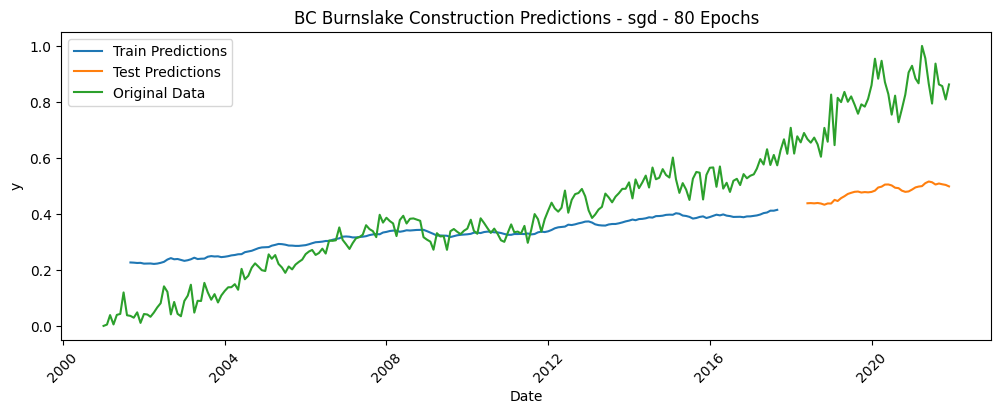

Metrics for sgd - 80 Epochs:
Train MSE: 0.02700801332786006
Test MSE: 0.11965908090706799
Train MAE: 0.08482892525182298
Test MAE: 0.33203417158022835
Train RMSE: 0.10395866390711393
Test RMSE: 0.34104947340941
2/2 [==============================] - 0s 10ms/step


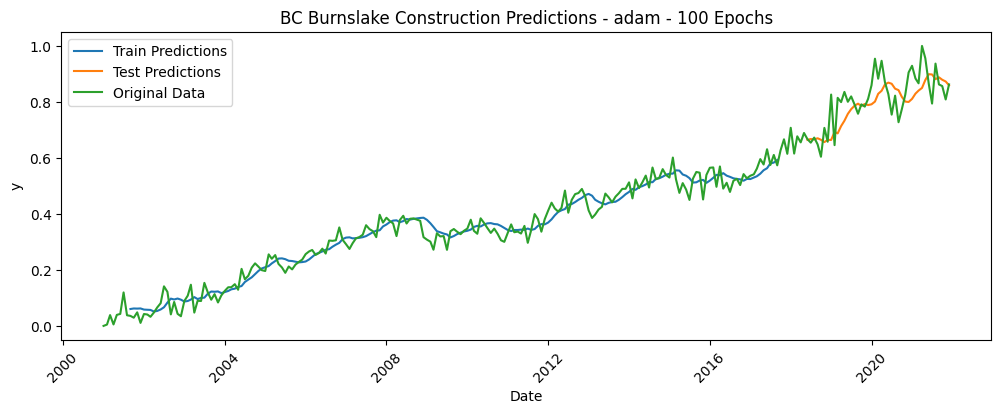

Metrics for adam - 100 Epochs:
Train MSE: 0.046718961487129916
Test MSE: 0.015273373741828094
Train MAE: 0.026002517147863412
Test MAE: 0.056835319802919795
Train RMSE: 0.032803727486766375
Test RMSE: 0.07246408192782795
2/2 [==============================] - 0s 6ms/step


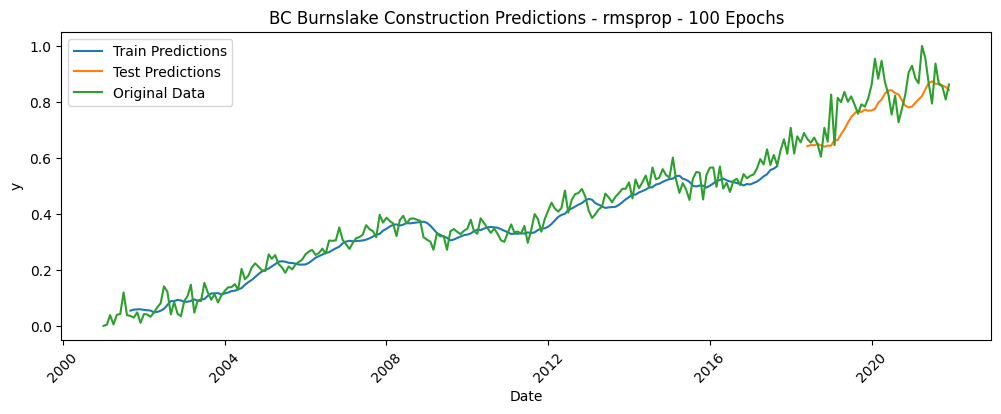

Metrics for rmsprop - 100 Epochs:
Train MSE: 0.045523420175714674
Test MSE: 0.016712408525534496
Train MAE: 0.029365193577774156
Test MAE: 0.06515298392443532
Train RMSE: 0.035916319258525196
Test RMSE: 0.08415787210199667
2/2 [==============================] - 0s 10ms/step


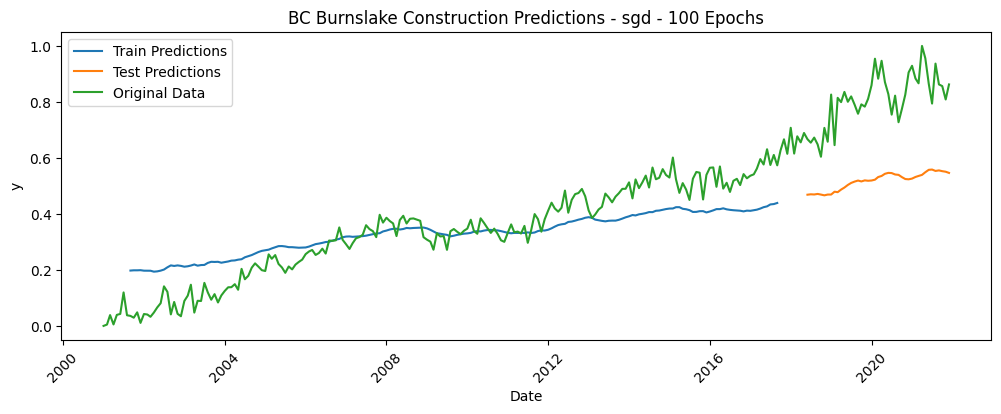

Metrics for sgd - 100 Epochs:
Train MSE: 0.028811291309345715
Test MSE: 0.09560291758200826
Train MAE: 0.0727646145819198
Test MAE: 0.2931240515476739
Train RMSE: 0.08955829156182457
Test RMSE: 0.3029240065354652
2/2 [==============================] - 0s 7ms/step


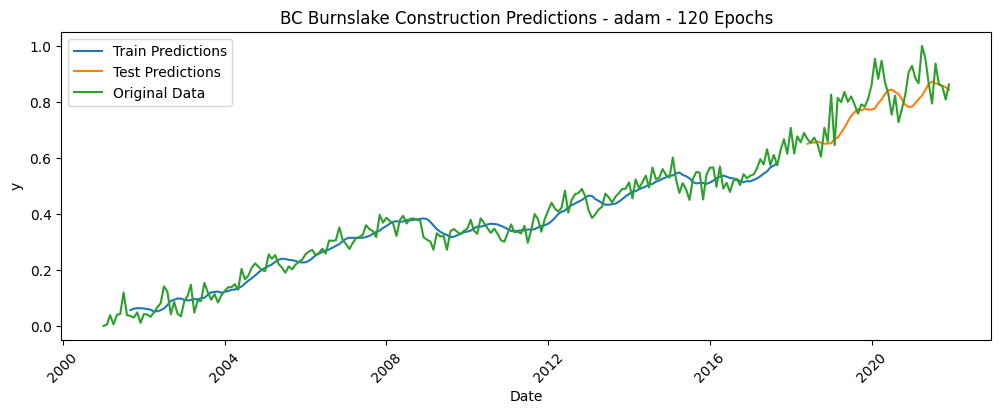

Metrics for adam - 120 Epochs:
Train MSE: 0.04612887777195174
Test MSE: 0.01594137819261388
Train MAE: 0.027516813719987897
Test MAE: 0.06339506063184476
Train RMSE: 0.03409658360872023
Test RMSE: 0.08248918354264705
2/2 [==============================] - 0s 12ms/step


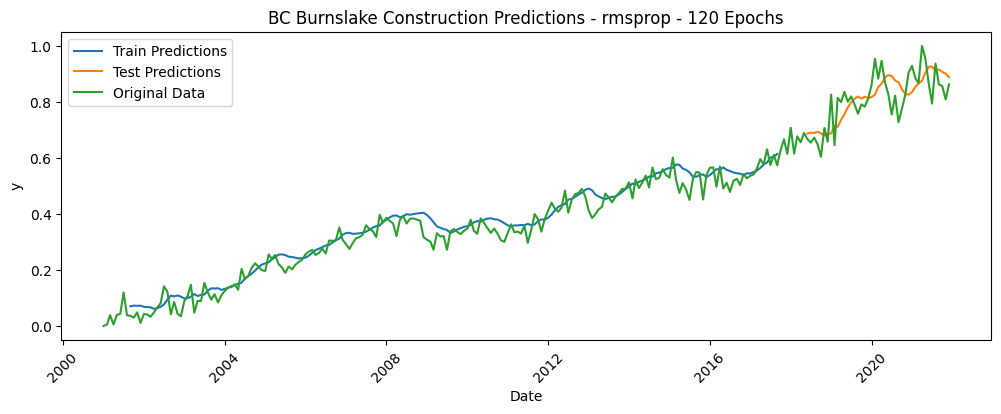

Metrics for rmsprop - 120 Epochs:
Train MSE: 0.048010081730285696
Test MSE: 0.015144912618601986
Train MAE: 0.028539952350541034
Test MAE: 0.05800205352420281
Train RMSE: 0.03711798095033551
Test RMSE: 0.07048656539446489
2/2 [==============================] - 0s 0s/step


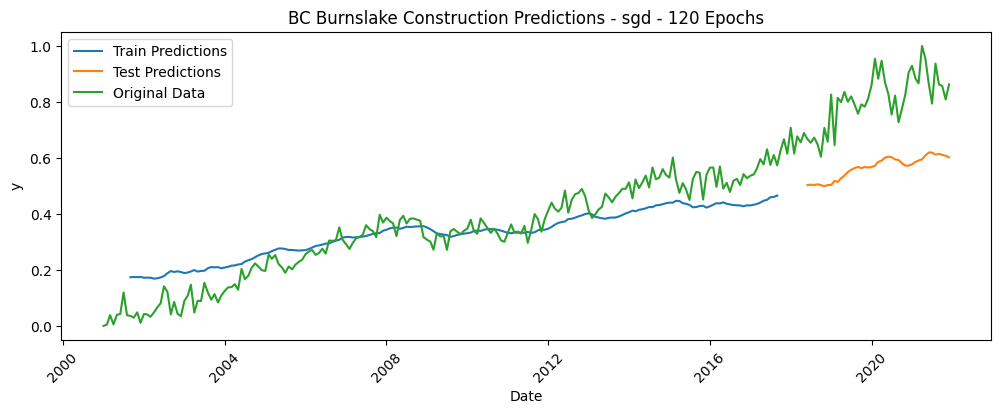

Metrics for sgd - 120 Epochs:
Train MSE: 0.030937178032733843
Test MSE: 0.07019448284843954
Train MAE: 0.06182491609789836
Test MAE: 0.24475064483804723
Train RMSE: 0.0764599502286162
Test RMSE: 0.25530755744487127


In [16]:
#Epoch applying
epochs_list = [50,80, 100, 120]
optimizers_list = ['adam','rmsprop','sgd' ]

#A new model is generated for every combination,
# and it is trained with training data (X_train and y_train) using the fit technique.

for epochs in epochs_list:
    for optimizer in optimizers_list:
        model = create_lstm_model(optimizer=optimizer)
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1, verbose=0)

# The model is used to predict on both the training and testing sets after it has been trained.
# The scaler is then used to inversely translate the predictions back to the original scale.
# For visual aid purposes, the original data and the forecasts are shown together.

        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)

        plt.figure(figsize=(12, 4))
        plt.plot(lstm_burns_lake.index[sequence_length:train_size], scaler.inverse_transform(train_predictions), label='Train Predictions')
        plt.plot(lstm_burns_lake.index[train_size + sequence_length:], scaler.inverse_transform(test_predictions), label='Test Predictions')
        plt.plot(lstm_burns_lake.index, lstm_burns_lake['Construction'], label='Original Data')
        plt.title(f'BC Burnslake Construction Predictions - {optimizer} - {epochs} Epochs')
        plt.xlabel('Date')
        plt.ylabel('y')
        plt.xticks(rotation=45)
        plt.legend()
        plt.show()

        train_mae = mean_absolute_error(scaler.inverse_transform(train_predictions), train['Construction'].values[sequence_length:])
        test_mae = mean_absolute_error(scaler.inverse_transform(test_predictions), test['Construction'].values[sequence_length:])
        
        train_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(train_predictions), train['Construction'].values[sequence_length:]))
        test_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(test_predictions), test['Construction'].values[sequence_length:]))
     
        train_mse = np.mean(np.square(scaler.inverse_transform(train_predictions) - train['Construction'].values[sequence_length:]))
        test_mse = np.mean(np.square(scaler.inverse_transform(test_predictions) - test['Construction'].values[sequence_length:]))
        print(f'Metrics for {optimizer} - {epochs} Epochs:')
        print(f'Train MSE: {train_mse}')
        print(f'Test MSE: {test_mse}')
        print(f'Train MAE: {train_mae}')
        print(f'Test MAE: {test_mae}')
        print(f'Train RMSE: {train_rmse}')
        print(f'Test RMSE: {test_rmse}')

<b><u>Best Analysis:
    
Metrics for rmsprop - 100 Epochs:

Train MSE: 0.04622832953885448

Test MSE: 0.01643431010524409

Train MAE: 0.02960113450494518

Test MAE: 0.06368295457033986

Train RMSE: 0.036179176926495984

Test RMSE: 0.08210399583152307

# British Columbia

# Kootenay Transportation Predictions

In [17]:
lstm_transportation_kootenay = lstm[lstm['Station Name'] == 'Kootenay'][['Date', 'Transportation']]
lstm_transportation_kootenay.set_index('Date', inplace=True)
lstm_transportation_kootenay.index = pd.to_datetime(lstm_burns_lake.index)

In [18]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [19]:
# Scaling the Data
scaler = MinMaxScaler()
lstm_transportation_kootenay['Transportation'] = scaler.fit_transform(lstm_transportation_kootenay[['Transportation']])


In [20]:
lstm_transportation_kootenay['Transportation'].head()


Date
2001-01-01    0.146150
2001-02-01    0.112355
2001-03-01    0.229303
2001-04-01    0.082480
2001-05-01    0.050486
Name: Transportation, dtype: float64

In [21]:
def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)


In [22]:
sequence_length = 11
X, y = create_sequences(lstm_transportation_kootenay['Transportation'].values, sequence_length)


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [24]:
# Spliting the Data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [25]:
n_steps =11
n_features =1

In [26]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [27]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

Text(0, 0.5, 'y')

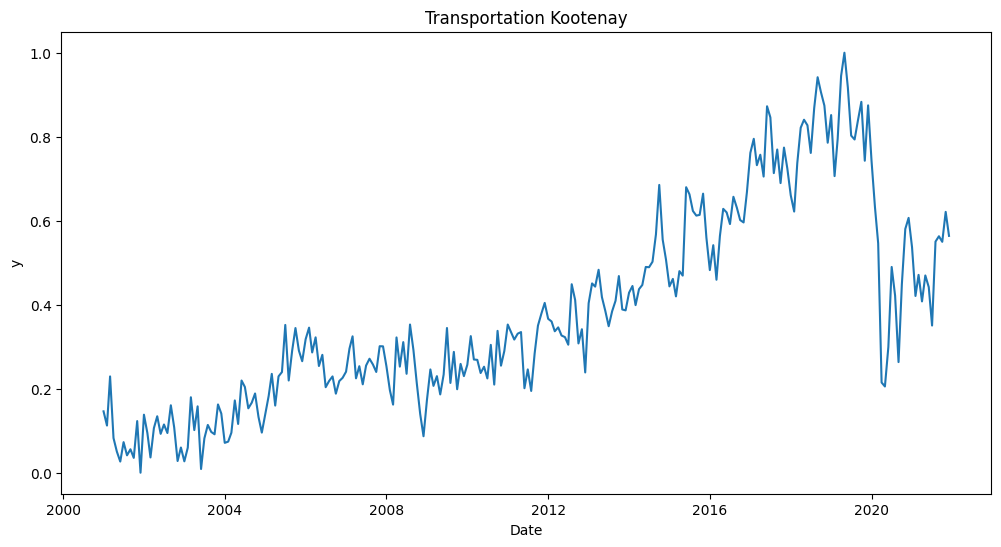

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(lstm_transportation_kootenay.index, lstm_transportation_kootenay['Transportation'], label='Original Data')
plt.title('Transportation Kootenay')
plt.xlabel('Date')
plt.ylabel('y')

In [29]:
#Scaling the data
scaler = MinMaxScaler()
lstm_transportation_kootenay[['Transportation']] = scaler.fit_transform(lstm_transportation_kootenay[['Transportation']])
#Split the data - we split the data in 80-20 which means 80 is for training and 20 is for testing
train_size = int(len(lstm_transportation_kootenay) * 0.8)
train, test = lstm_transportation_kootenay[:train_size], lstm_transportation_kootenay[train_size:]

def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 8  # Adjust based on your data

X_train, y_train = create_sequences(train['Transportation'].values, sequence_length)
X_test, y_test = create_sequences(test['Transportation'].values, sequence_length)

# Reshape input for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# LSTM model creation
def create_lstm_model(optimizer='adam'):
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model


2/2 [==============================] - 0s 7ms/step


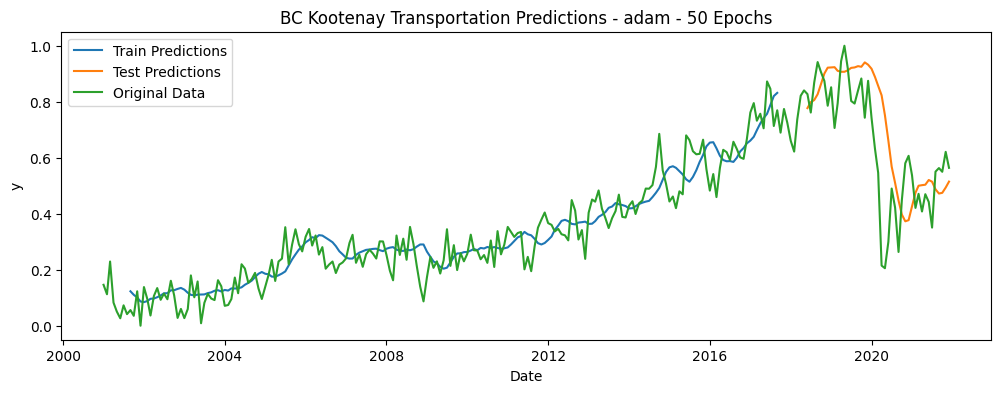

Metrics for adam - 50 Epochs:
Train MSE: 0.06426062181727549
Test MSE: 0.09361392723847674
Train MAE: 0.052796229044665334
Test MAE: 0.13275614011492842
Train RMSE: 0.06697026877566059
Test RMSE: 0.1826184588380986
2/2 [==============================] - 0s 5ms/step


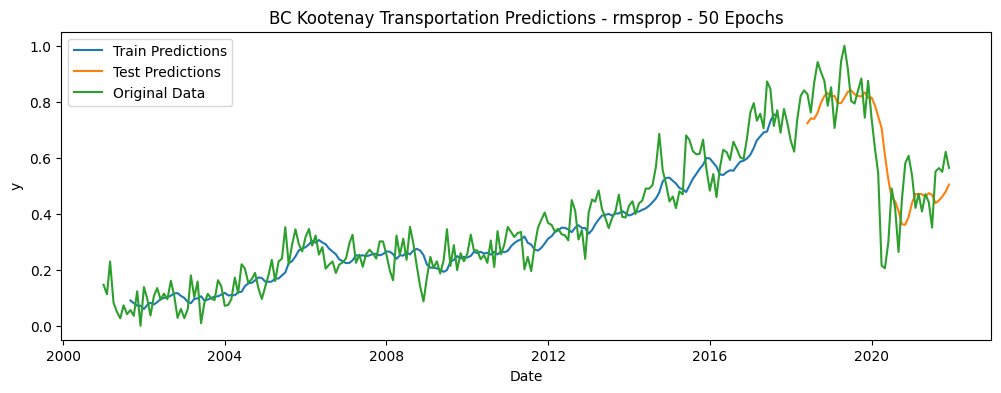

Metrics for rmsprop - 50 Epochs:
Train MSE: 0.06132904649265812
Test MSE: 0.07738378537020957
Train MAE: 0.051505251955748524
Test MAE: 0.1086606304950317
Train RMSE: 0.06614770671884623
Test RMSE: 0.14568431418351552
2/2 [==============================] - 0s 11ms/step


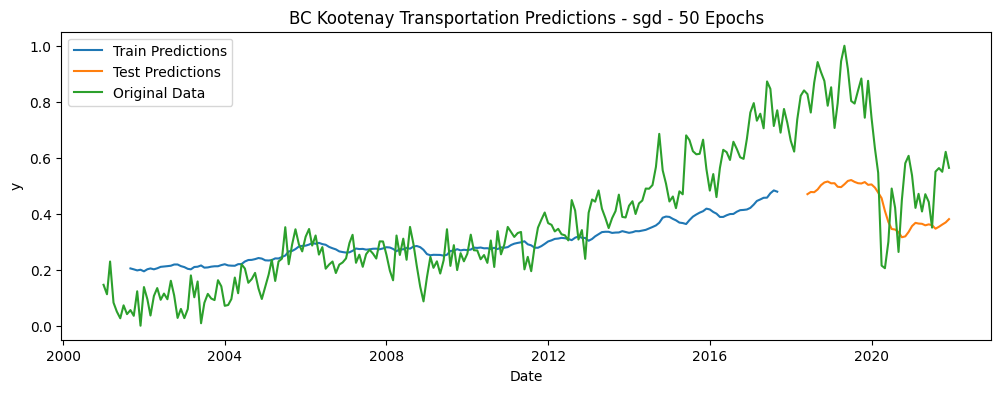

Metrics for sgd - 50 Epochs:
Train MSE: 0.039745160928943236
Test MSE: 0.0952151585951128
Train MAE: 0.09657458744883411
Test MAE: 0.2354123036125949
Train RMSE: 0.12721538087967763
Test RMSE: 0.26640112219478995
2/2 [==============================] - 0s 7ms/step


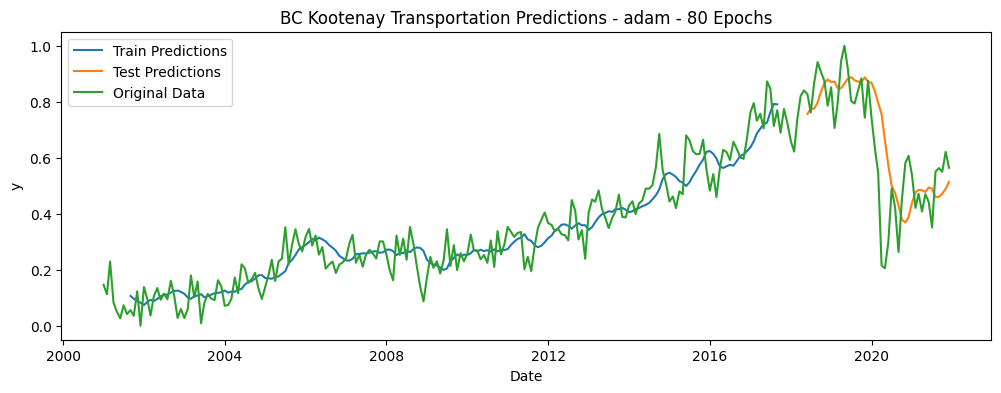

Metrics for adam - 80 Epochs:
Train MSE: 0.0625603610907132
Test MSE: 0.08413798929352177
Train MAE: 0.05068385304683772
Test MAE: 0.11245128067351734
Train RMSE: 0.06424975917486012
Test RMSE: 0.1564963471246288
2/2 [==============================] - 0s 10ms/step


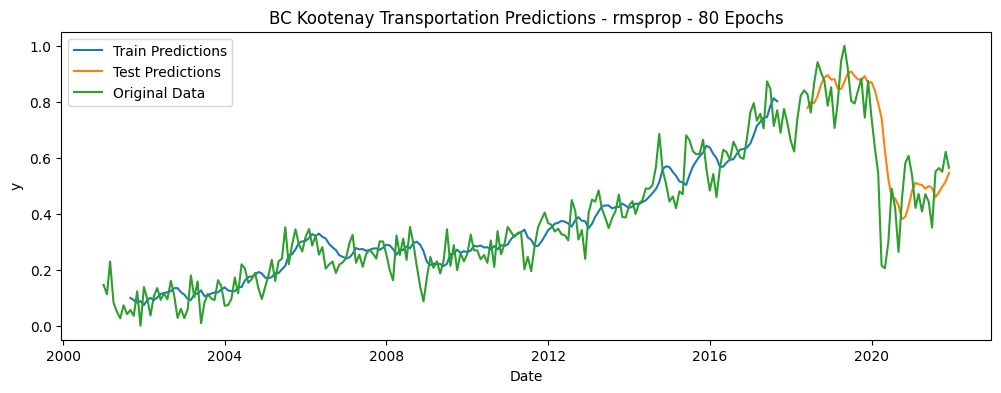

Metrics for rmsprop - 80 Epochs:
Train MSE: 0.06405627982870016
Test MSE: 0.08471291971888789
Train MAE: 0.04943987783582492
Test MAE: 0.10746345850433978
Train RMSE: 0.06257304513691174
Test RMSE: 0.14837567412716784
2/2 [==============================] - 0s 8ms/step


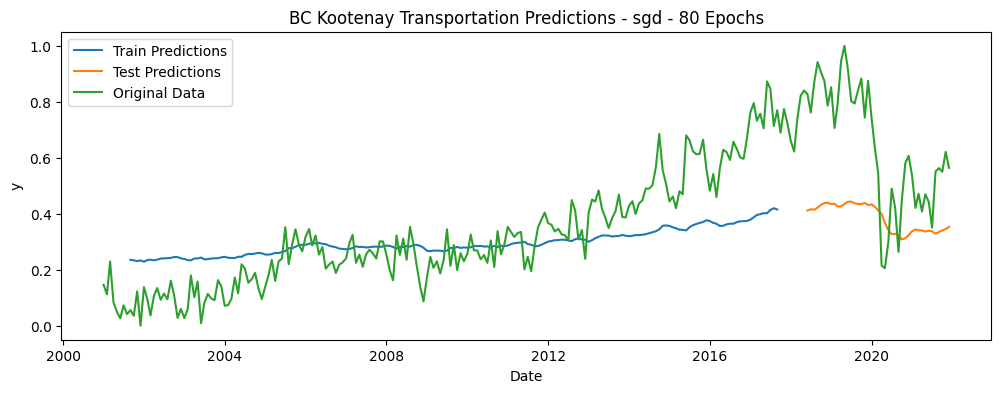

Metrics for sgd - 80 Epochs:
Train MSE: 0.03717469281916428
Test MSE: 0.11379596184237306
Train MAE: 0.11248289737874853
Test MAE: 0.2753248539552199
Train RMSE: 0.14699374287303626
Test RMSE: 0.31259751718050405
2/2 [==============================] - 0s 4ms/step


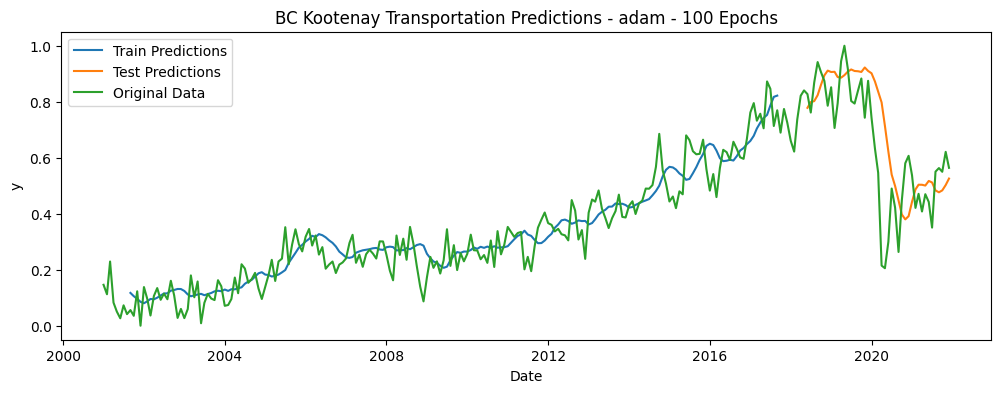

Metrics for adam - 100 Epochs:
Train MSE: 0.06437905340749857
Test MSE: 0.08948796969983447
Train MAE: 0.05167597751948752
Test MAE: 0.12405112155021626
Train RMSE: 0.06549405610926211
Test RMSE: 0.17121281958883094
2/2 [==============================] - 0s 9ms/step


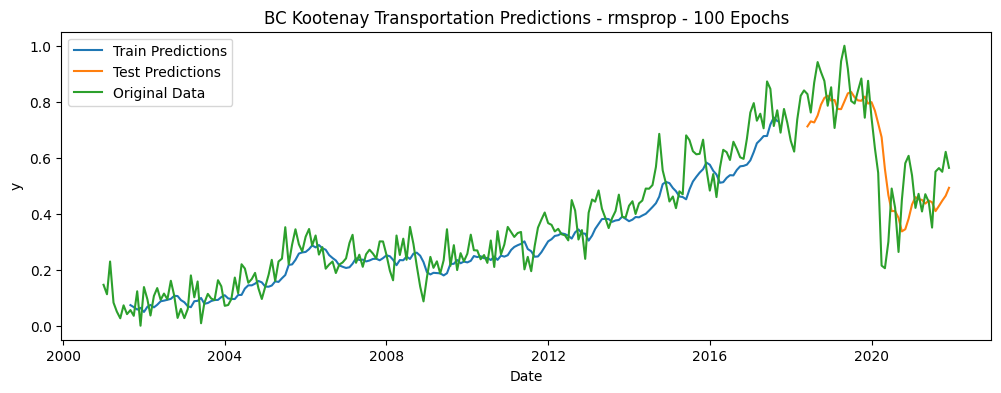

Metrics for rmsprop - 100 Epochs:
Train MSE: 0.06148842185361966
Test MSE: 0.07933527667715846
Train MAE: 0.055124544444846955
Test MAE: 0.10975062762374249
Train RMSE: 0.0714011379162123
Test RMSE: 0.14131654979240246
2/2 [==============================] - 0s 8ms/step


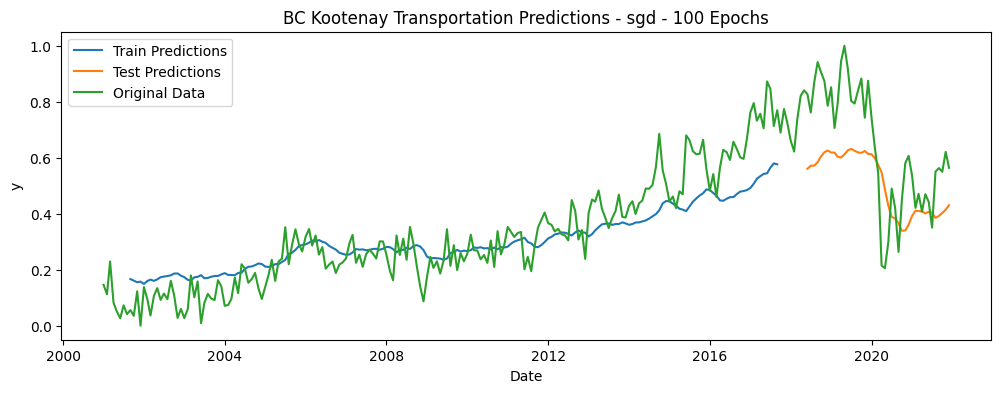

Metrics for sgd - 100 Epochs:
Train MSE: 0.04510490258701866
Test MSE: 0.07546202408452547
Train MAE: 0.07425120879533281
Test MAE: 0.17535225587176193
Train RMSE: 0.09843293493404273
Test RMSE: 0.2026876876162451
2/2 [==============================] - 0s 3ms/step


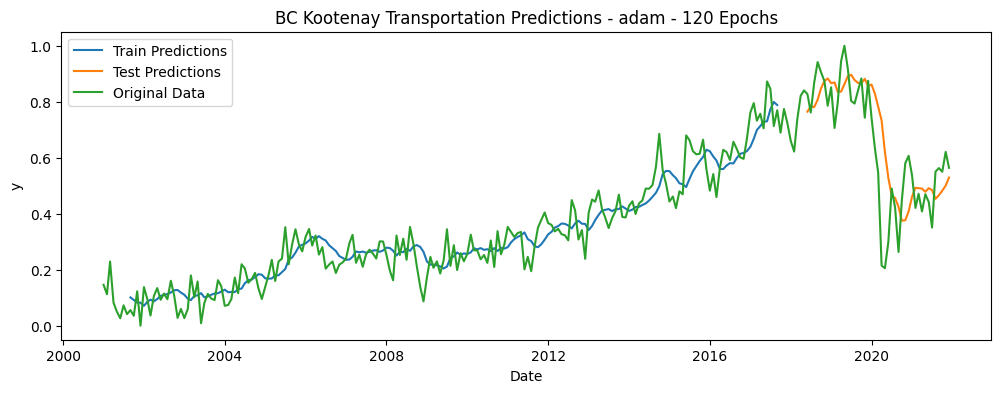

Metrics for adam - 120 Epochs:
Train MSE: 0.06302620493124704
Test MSE: 0.08355074748898375
Train MAE: 0.049567469093510556
Test MAE: 0.10699016445800286
Train RMSE: 0.0627306125190656
Test RMSE: 0.14722914437057674
2/2 [==============================] - 0s 8ms/step


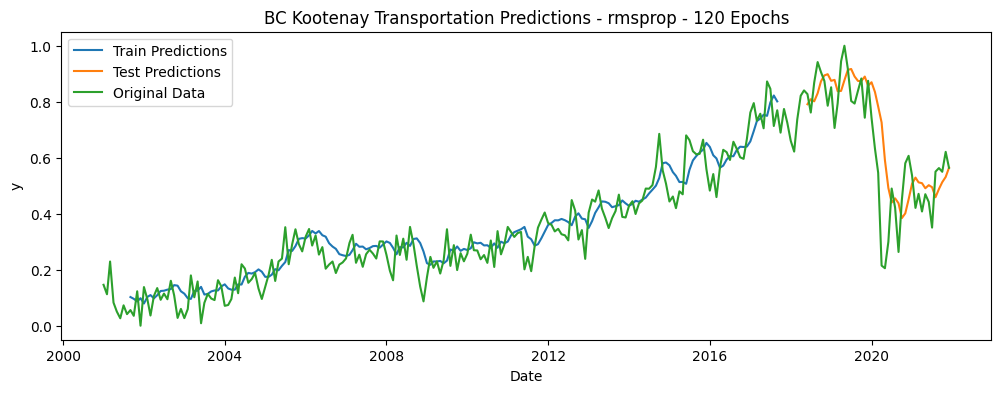

Metrics for rmsprop - 120 Epochs:
Train MSE: 0.06438556956258307
Test MSE: 0.08411148338687613
Train MAE: 0.05031241910451997
Test MAE: 0.10298706549666298
Train RMSE: 0.06314912544454786
Test RMSE: 0.14191246791167275
2/2 [==============================] - 0s 10ms/step


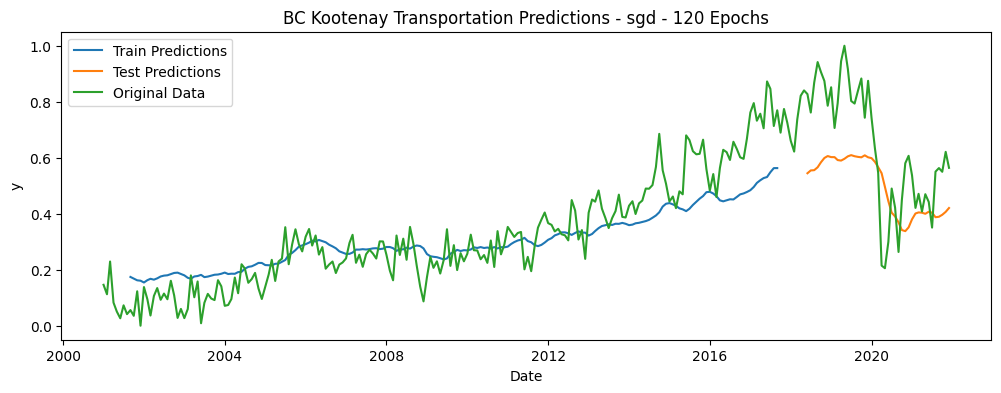

Metrics for sgd - 120 Epochs:
Train MSE: 0.04426525804397369
Test MSE: 0.07637243442048007
Train MAE: 0.07700966681138569
Test MAE: 0.18487271076614575
Train RMSE: 0.10218351204573026
Test RMSE: 0.21314622076985706


In [30]:
#Epoch applying
epochs_list = [50,80, 100, 120]
optimizers_list = ['adam','rmsprop','sgd' ]

#A new model is generated for every combination,
# and it is trained with training data (X_train and y_train) using the fit technique.

for epochs in epochs_list:
    for optimizer in optimizers_list:
        model = create_lstm_model(optimizer=optimizer)
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1, verbose=0)

# The model is used to predict on both the training and testing sets after it has been trained.
# The scaler is then used to inversely translate the predictions back to the original scale.
# For visual aid purposes, the original data and the forecasts are shown together.

        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)

        plt.figure(figsize=(12, 4))
        plt.plot(lstm_transportation_kootenay.index[sequence_length:train_size], scaler.inverse_transform(train_predictions), label='Train Predictions')
        plt.plot(lstm_transportation_kootenay.index[train_size + sequence_length:], scaler.inverse_transform(test_predictions), label='Test Predictions')
        plt.plot(lstm_transportation_kootenay.index, lstm_transportation_kootenay['Transportation'], label='Original Data')
        plt.title(f'BC Kootenay Transportation Predictions - {optimizer} - {epochs} Epochs')
        plt.xlabel('Date')
        plt.ylabel('y')
        plt.legend()
        plt.show()

        train_mae = mean_absolute_error(scaler.inverse_transform(train_predictions), train['Transportation'].values[sequence_length:])
        test_mae = mean_absolute_error(scaler.inverse_transform(test_predictions), test['Transportation'].values[sequence_length:])
        
        train_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(train_predictions), train['Transportation'].values[sequence_length:]))
        test_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(test_predictions), test['Transportation'].values[sequence_length:]))
     
        train_mse = np.mean(np.square(scaler.inverse_transform(train_predictions) - train['Transportation'].values[sequence_length:]))
        test_mse = np.mean(np.square(scaler.inverse_transform(test_predictions) - test['Transportation'].values[sequence_length:]))
        print(f'Metrics for {optimizer} - {epochs} Epochs:')
        print(f'Train MSE: {train_mse}')
        print(f'Test MSE: {test_mse}')
        print(f'Train MAE: {train_mae}')
        print(f'Test MAE: {test_mae}')
        print(f'Train RMSE: {train_rmse}')
        print(f'Test RMSE: {test_rmse}')

<b><u>Best Analysis:
    
Metrics for adam - 120 Epochs:
    
Train MSE: 0.0631895425060202
    
Test MSE: 0.0816619561066328
    
Train MAE: 0.04791283372209922
    
Test MAE: 0.09897831130242941
    
Train RMSE: 0.06080739534478063
    
Test RMSE: 0.1340309922617607
    

# British Columbia

## Pemberton Agriculture Predicitions

In [32]:
lstm_agriculture_pemberton = lstm[lstm['Station Name'] == 'Pemberton'][['Date', 'Agriculture']]
lstm_agriculture_pemberton.set_index('Date', inplace=True)
lstm_agriculture_pemberton.index = pd.to_datetime(lstm_agriculture_pemberton.index)

In [33]:
def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)


In [34]:
sequence_length = 11
X, y = create_sequences(lstm_agriculture_pemberton['Agriculture'].values, sequence_length)

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [36]:
# Spliting the Data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [37]:
n_steps =11
n_features =1

In [38]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [39]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

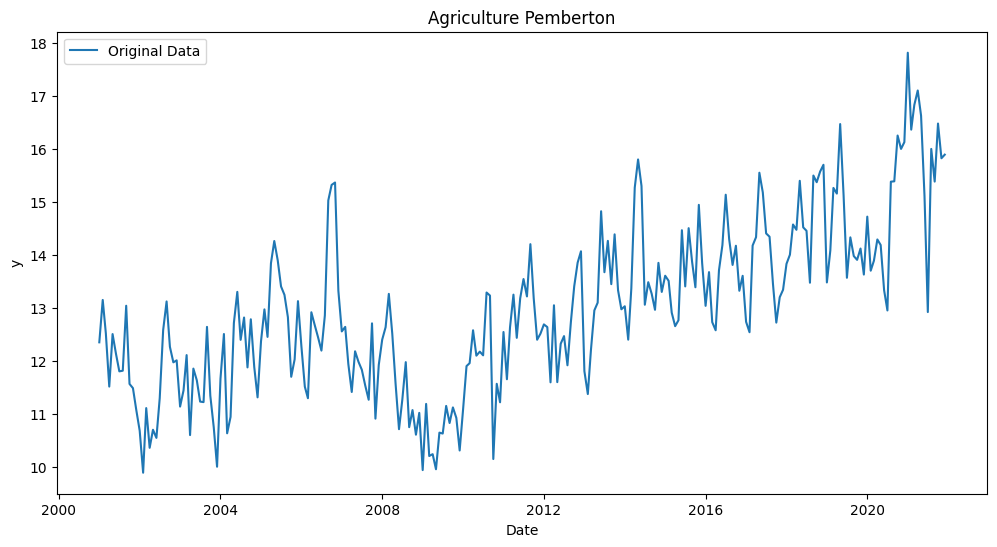

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(lstm_agriculture_pemberton.index, lstm_agriculture_pemberton['Agriculture'], label='Original Data')
plt.title('Agriculture Pemberton')
plt.xlabel('Date')
plt.ylabel('y')
plt.legend()
plt.show()

In [43]:
#Scaling the data
scaler = MinMaxScaler()
lstm_agriculture_pemberton[['Agriculture']] = scaler.fit_transform(lstm_agriculture_pemberton[['Agriculture']])
#Split the data - we split the data in 80-20 which means 80 is for training and 20 is for testing
train_size = int(len(lstm_agriculture_pemberton) * 0.8)
train, test = lstm_agriculture_pemberton[:train_size], lstm_agriculture_pemberton[train_size:]

def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 11  # Adjust based on your data

X_train, y_train = create_sequences(train['Agriculture'].values, sequence_length)
X_test, y_test = create_sequences(test['Agriculture'].values, sequence_length)

# Reshape input for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# LSTM model creation
def create_lstm_model(optimizer='adam'):
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model


2/2 [==============================] - 0s 6ms/step


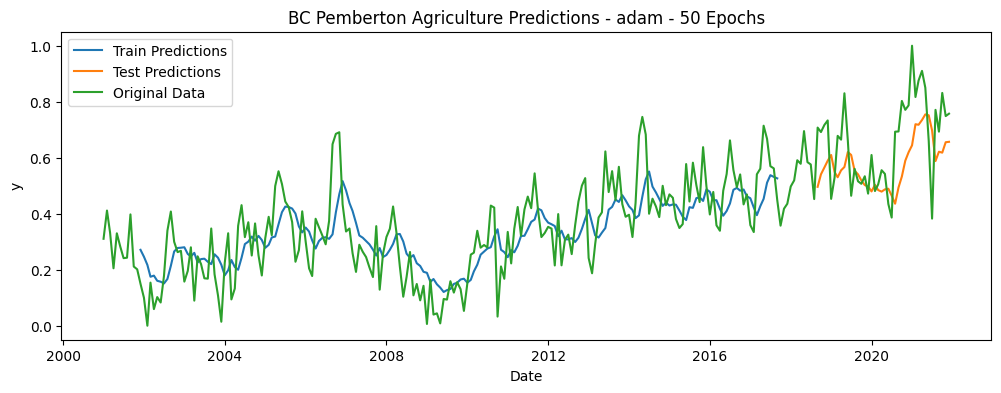

Metrics for adam - 50 Epochs:
Train MSE: 0.0372922163986304
Test MSE: 0.03682074080571964
Train MAE: 0.09063616048525766
Test MAE: 0.12767756259692847
Train RMSE: 0.11327107149880258
Test RMSE: 0.15427945996145523
2/2 [==============================] - 0s 6ms/step


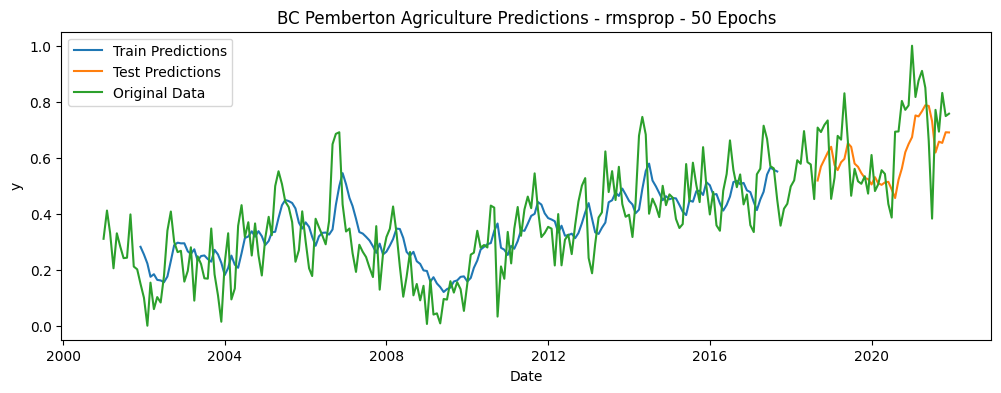

Metrics for rmsprop - 50 Epochs:
Train MSE: 0.03870552799537839
Test MSE: 0.03359871622370287
Train MAE: 0.0907669483292817
Test MAE: 0.11556769937679538
Train RMSE: 0.11209373335375367
Test RMSE: 0.14171783508397945
2/2 [==============================] - 0s 5ms/step


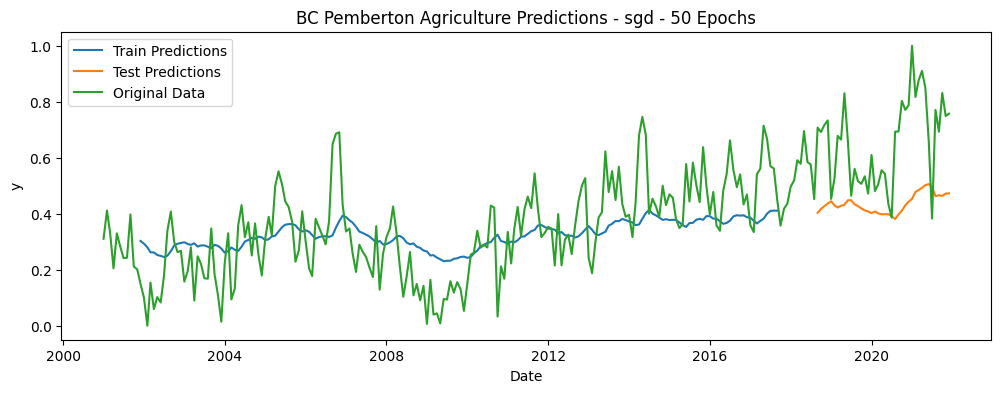

Metrics for sgd - 50 Epochs:
Train MSE: 0.02880313126398912
Test MSE: 0.07303034300238669
Train MAE: 0.10722586608325409
Test MAE: 0.22665281692907424
Train RMSE: 0.1346058169473832
Test RMSE: 0.2618899509161328
2/2 [==============================] - 0s 6ms/step


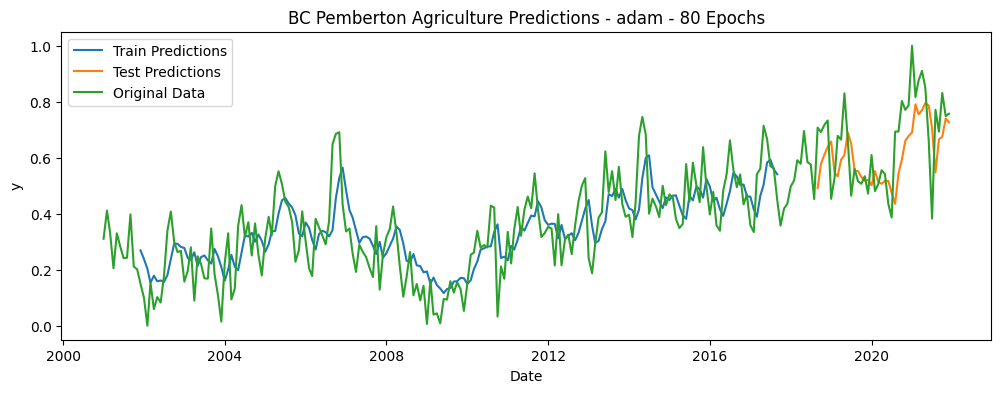

Metrics for adam - 80 Epochs:
Train MSE: 0.03960530769051532
Test MSE: 0.03484705381041861
Train MAE: 0.08629592138387827
Test MAE: 0.10896176308803032
Train RMSE: 0.10701345851626892
Test RMSE: 0.13775456810097408
2/2 [==============================] - 0s 7ms/step


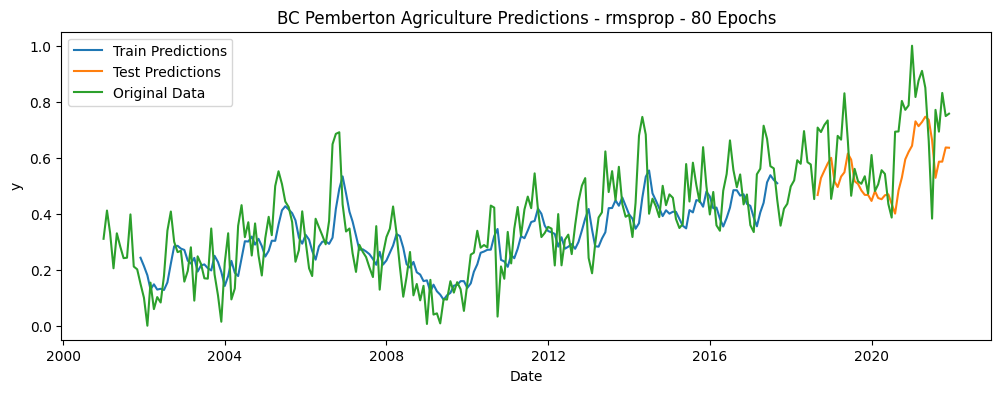

Metrics for rmsprop - 80 Epochs:
Train MSE: 0.038518551247058136
Test MSE: 0.04189296898509075
Train MAE: 0.0880357912602218
Test MAE: 0.13694505186718037
Train RMSE: 0.11242062064174951
Test RMSE: 0.16390666210579133
2/2 [==============================] - 0s 5ms/step


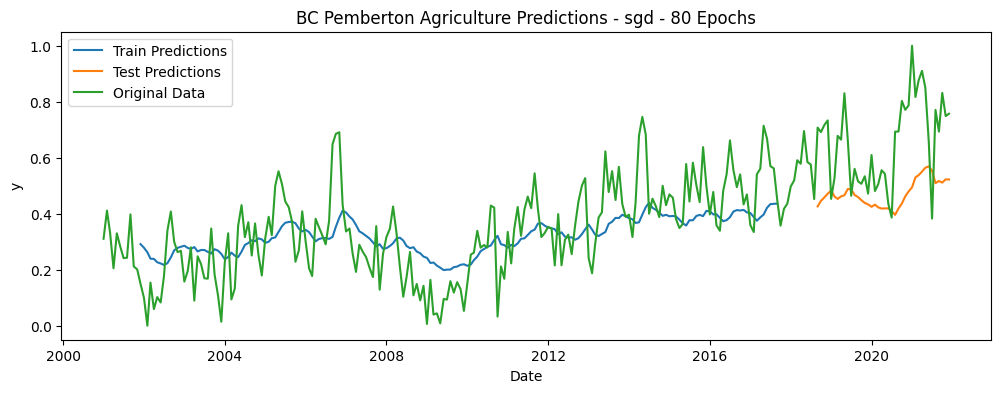

Metrics for sgd - 80 Epochs:
Train MSE: 0.03045434978264573
Test MSE: 0.059593102493276574
Train MAE: 0.10200587987975059
Test MAE: 0.19748912501768204
Train RMSE: 0.12802557907185236
Test RMSE: 0.23110900533668052
2/2 [==============================] - 0s 5ms/step


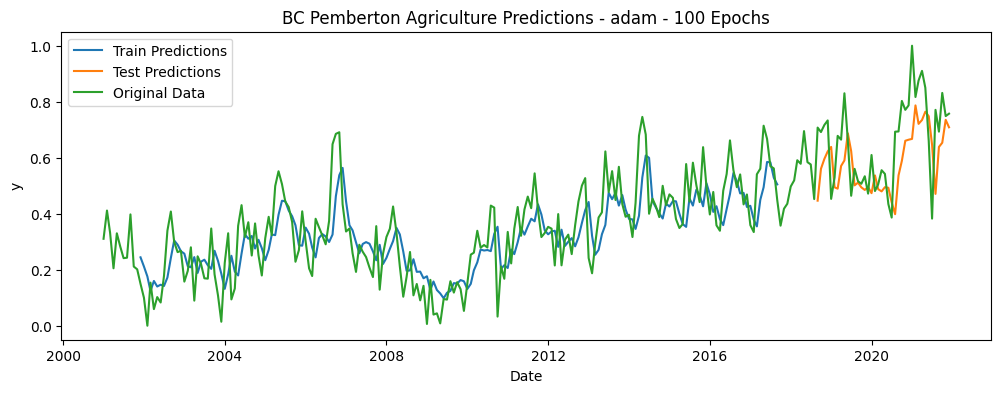

Metrics for adam - 100 Epochs:
Train MSE: 0.03978971492906892
Test MSE: 0.03917295889583827
Train MAE: 0.08309024213806876
Test MAE: 0.1192907161693754
Train RMSE: 0.10551281571603463
Test RMSE: 0.14846855258415997
2/2 [==============================] - 0s 5ms/step


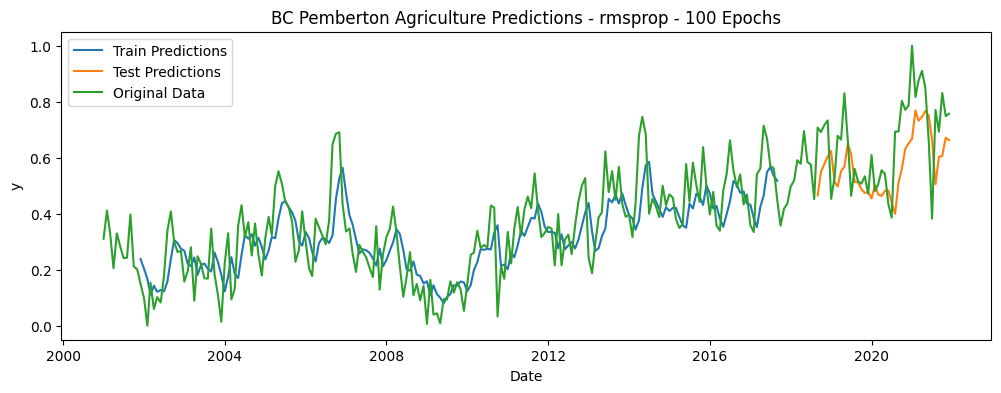

Metrics for rmsprop - 100 Epochs:
Train MSE: 0.04018550128028256
Test MSE: 0.04015666454435701
Train MAE: 0.08498922991378541
Test MAE: 0.12603967030418217
Train RMSE: 0.10841946762166668
Test RMSE: 0.1534916569844186
2/2 [==============================] - 0s 6ms/step


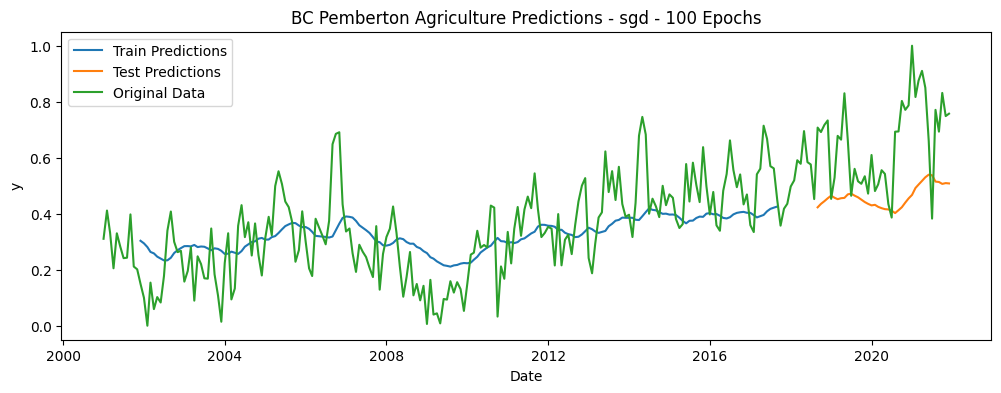

Metrics for sgd - 100 Epochs:
Train MSE: 0.029769727320580572
Test MSE: 0.06285000754067532
Train MAE: 0.10616260409508975
Test MAE: 0.20542000133232205
Train RMSE: 0.13246303163757836
Test RMSE: 0.24237388073683044
2/2 [==============================] - 0s 5ms/step


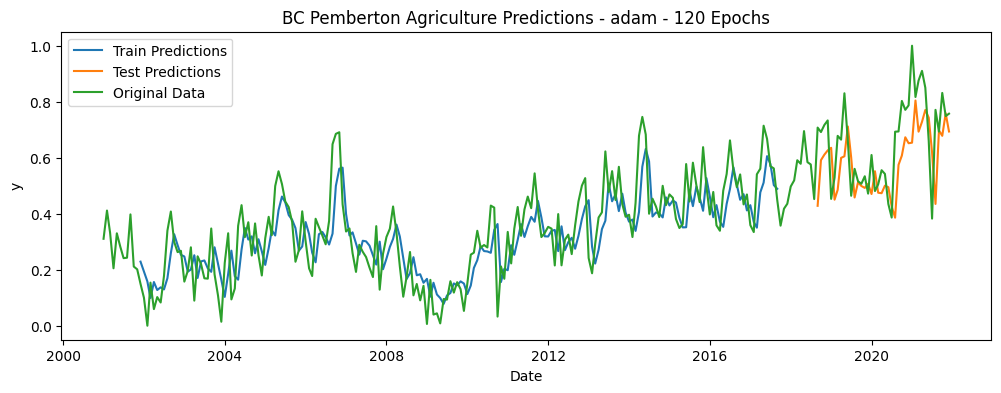

Metrics for adam - 120 Epochs:
Train MSE: 0.04129269939802591
Test MSE: 0.040479368811324995
Train MAE: 0.08305002698781974
Test MAE: 0.11810577267549056
Train RMSE: 0.10365912945573169
Test RMSE: 0.14892247778780576
2/2 [==============================] - 0s 5ms/step


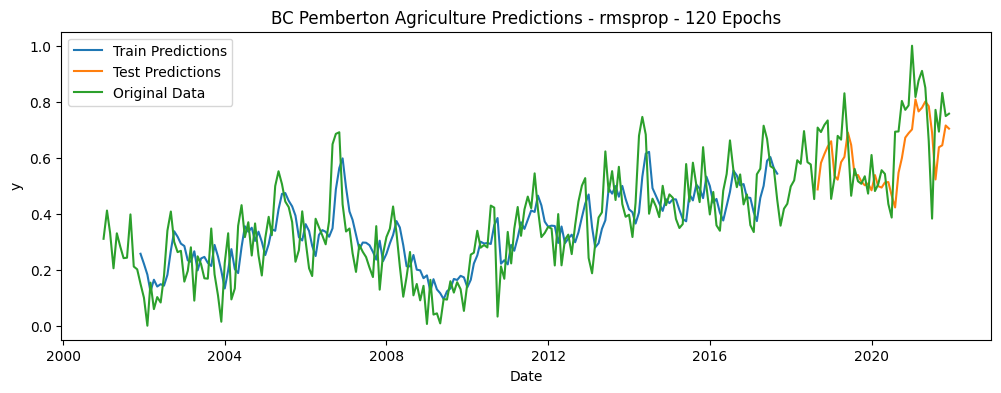

Metrics for rmsprop - 120 Epochs:
Train MSE: 0.04087009943888117
Test MSE: 0.036525042659215134
Train MAE: 0.08566129083147099
Test MAE: 0.11015931351473589
Train RMSE: 0.10574575696221261
Test RMSE: 0.13880108299278504
2/2 [==============================] - 0s 7ms/step


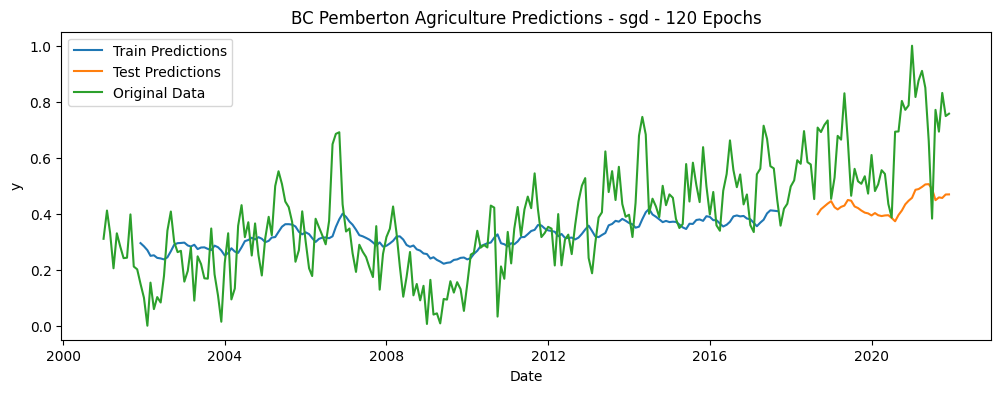

Metrics for sgd - 120 Epochs:
Train MSE: 0.029040248515728163
Test MSE: 0.07462186584331326
Train MAE: 0.10612593185039171
Test MAE: 0.2293482665817887
Train RMSE: 0.13336765559513827
Test RMSE: 0.2635588722789048


In [44]:
#Epoch applying
epochs_list = [50,80, 100, 120]
optimizers_list = ['adam','rmsprop','sgd' ]

#A new model is generated for every combination,
# and it is trained with training data (X_train and y_train) using the fit technique.

for epochs in epochs_list:
    for optimizer in optimizers_list:
        model = create_lstm_model(optimizer=optimizer)
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1, verbose=0)

# The model is used to predict on both the training and testing sets after it has been trained.
# The scaler is then used to inversely translate the predictions back to the original scale.
# For visual aid purposes, the original data and the forecasts are shown together.

        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)

        plt.figure(figsize=(12, 4))
        plt.plot(lstm_agriculture_pemberton.index[sequence_length:train_size], scaler.inverse_transform(train_predictions), label='Train Predictions')
        plt.plot(lstm_agriculture_pemberton.index[train_size + sequence_length:], scaler.inverse_transform(test_predictions), label='Test Predictions')
        plt.plot(lstm_agriculture_pemberton.index, lstm_agriculture_pemberton['Agriculture'], label='Original Data')
        plt.title(f'BC Pemberton Agriculture Predictions - {optimizer} - {epochs} Epochs')
        plt.xlabel('Date')
        plt.ylabel('y')
        plt.legend()
        plt.show()

        train_mae = mean_absolute_error(scaler.inverse_transform(train_predictions), train['Agriculture'].values[sequence_length:])
        test_mae = mean_absolute_error(scaler.inverse_transform(test_predictions), test['Agriculture'].values[sequence_length:])
        
        train_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(train_predictions), train['Agriculture'].values[sequence_length:]))
        test_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(test_predictions), test['Agriculture'].values[sequence_length:]))
     
        train_mse = np.mean(np.square(scaler.inverse_transform(train_predictions) - train['Agriculture'].values[sequence_length:]))
        test_mse = np.mean(np.square(scaler.inverse_transform(test_predictions) - test['Agriculture'].values[sequence_length:]))
        print(f'Metrics for {optimizer} - {epochs} Epochs:')
        print(f'Train MSE: {train_mse}')
        print(f'Test MSE: {test_mse}')
        print(f'Train MAE: {train_mae}')
        print(f'Test MAE: {test_mae}')
        print(f'Train RMSE: {train_rmse}')
        print(f'Test RMSE: {test_rmse}')

Metrics for adam - 120 Epochs:

Train MSE: 0.04129269939802591

Test MSE: 0.040479368811324995

Train MAE: 0.08305002698781974

Test MAE: 0.11810577267549056

Train RMSE: 0.10365912945573169

Test RMSE: 0.14892247778780576
    